In [1]:
import numpy as np
import scipy
from scipy import stats
from astropy.io import fits
cosmos_list = fits.open('cosmos_3dhst.v4.1.cat.FITS', memmap=True)
cosmos_data = cosmos_list[1].data
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pha_list = fits.open('3dhst.v4.1.4.full.v1.fits', memmap=True)
pha_data = pha_list[1].data
import numpy.ma as ma

def magab_err(flux, error):
    if (np.absolute(error)) >= flux:
        return 1.085
    else:
        return np.absolute((-1.085)* (error/flux))
    
def magab(flux, error):
    if error > flux:
        return (((-2.5)*(np.log10(error))) + 25 )
    else:
        return (((-2.5)*(np.log10(flux))) + 25 )

magfunc = np.vectorize(magab)
magerrorfunc = np.vectorize(magab_err)

In [3]:
print scipy.stats.itemfreq(pha_data['id'][41200:75079] == cosmos_data['id'])
cosmos_phot_use_1= (cosmos_data['use_phot']==1)
print scipy.stats.itemfreq((cosmos_data['use_phot']==1))

[[    1 33879]]
[[    0  3847]
 [    1 30032]]


In [4]:
def cutter (a, a_err, b, b_err, c, c_err): 
    return (((magfunc(a, a_err)- magfunc(b, b_err) >(0.44 + (((magerrorfunc(a, a_err))**2) + ((magerrorfunc(b, b_err))**2))**.5)) & 
(magfunc(c, c_err)- magfunc(b, b_err) >(0.44 + (((magerrorfunc(c, c_err))**2) + ((magerrorfunc(b, b_err))**2))**.5))) & cosmos_phot_use_1 & ((a>=0)& (b>=0) & (c>=0)) & (((a/a_err)>3)&((b/b_err)>3)&((c/c_err)>3)))
#& (((a/a_err)>3)&((b/b_err)>3)&((c/c_err)>3))

In [5]:
###jhk selection###
afils = [cosmos_data['f_j1'], cosmos_data['e_j1'], cosmos_data['f_j2'], cosmos_data['e_j2'], cosmos_data['f_j3'], cosmos_data['e_j3'] , cosmos_data['f_f125w'],cosmos_data['e_f125w'], cosmos_data['f_j'], cosmos_data['e_j'], cosmos_data['f_UVISTA_J'], cosmos_data['e_UVISTA_J'] ]
bfils= [cosmos_data['f_f140w'], cosmos_data['e_f140w'], cosmos_data['f_f160w'], cosmos_data['e_f160w'], cosmos_data['f_h1'], cosmos_data['e_h1'] , cosmos_data['f_h2'],cosmos_data['e_h2'], cosmos_data['f_h'], cosmos_data['e_h'], cosmos_data['f_UVISTA_H'], cosmos_data['e_UVISTA_H'] ]
cfils= [cosmos_data['f_k'], cosmos_data['e_k'], cosmos_data['f_ks'], cosmos_data['e_ks'], cosmos_data['f_uvista_ks'], cosmos_data['e_uvista_ks']]

for a in range(0,6):
    for b in range (0,6):
        for c in range (0,3):
            globals()['cosmos_jhk%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,6):
    for b in range (0,6):
        for c in range (0,3):
            print "cosmos_jhk%d%d%d"%(a,b,c), np.count_nonzero((globals()['cosmos_jhk%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


cosmos_jhk000 0
cosmos_jhk001 0
cosmos_jhk002 2
cosmos_jhk010 3
cosmos_jhk011 3
cosmos_jhk012 5
cosmos_jhk020 27
cosmos_jhk021 48
cosmos_jhk022 184
cosmos_jhk030 47
cosmos_jhk031 77
cosmos_jhk032 296
cosmos_jhk040 5
cosmos_jhk041 5
cosmos_jhk042 61
cosmos_jhk050 8
cosmos_jhk051 7
cosmos_jhk052 15
cosmos_jhk100 0
cosmos_jhk101 0
cosmos_jhk102 2
cosmos_jhk110 2
cosmos_jhk111 2
cosmos_jhk112 7
cosmos_jhk120 21
cosmos_jhk121 34
cosmos_jhk122 135
cosmos_jhk130 38
cosmos_jhk131 62
cosmos_jhk132 220
cosmos_jhk140 4
cosmos_jhk141 2
cosmos_jhk142 43
cosmos_jhk150 6
cosmos_jhk151 5
cosmos_jhk152 8
cosmos_jhk200 0
cosmos_jhk201 0
cosmos_jhk202 1
cosmos_jhk210 1
cosmos_jhk211 2
cosmos_jhk212 4
cosmos_jhk220 21
cosmos_jhk221 27
cosmos_jhk222 100
cosmos_jhk230 30
cosmos_jhk231 56
cosmos_jhk232 180
cosmos_jhk240 3
cosmos_jhk241 2
cosmos_jhk242 26
cosmos_jhk250 4
cosmos_jhk251 4
cosmos_jhk252 7
cosmos_jhk300 0
cosmos_jhk301 0
cosmos_jhk302 3
cosmos_jhk310 0
cosmos_jhk311 2
cosmos_jhk312 13
cosmos_jhk3

In [7]:
print (cosmos_data['id'][((cosmos_jhk302) | (cosmos_jhk311) | (cosmos_jhk312))])

[ 2942  3208  3865  5642  6232  6656 13373 14846 18200 19704 20373 22368
 23607 26357 31664]


1
1
1


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: RuntimeWarning: overflow encountered in square
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: overflow encountered in square


(0, 2000)

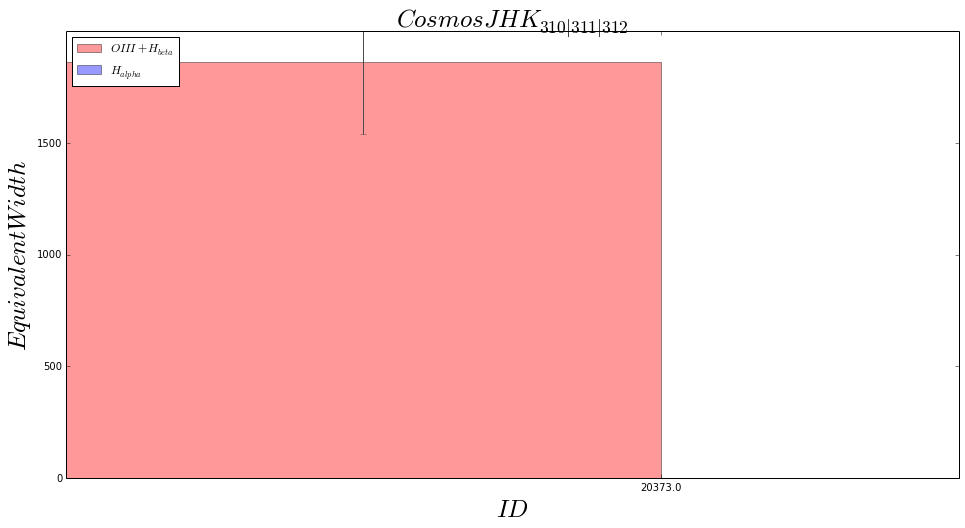

In [8]:
cosmos_oxy = pha_data['OIII_EQW'][41200:75079]
cosmos_hbeta = pha_data['HBETA_EQW'][41200:75079]
cosmos_eqw_sum = cosmos_oxy + cosmos_hbeta
cosmos_eqw_err_1 = (pha_data['OIII_EQW_ERR'][41200:75079])**2
cosmos_eqw_err_2 = (pha_data['HBETA_EQW_ERR'][41200:75079])**2
cosmos_eqw_err_net = (cosmos_eqw_err_1 + cosmos_eqw_err_2)**0.5

current_cut = (cosmos_jhk310|cosmos_jhk311|cosmos_jhk312)
#insert cut above
plt.figure(figsize=(16,8))
n_groups = len(cosmos_eqw_sum[(current_cut == 1)&((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))])
print n_groups
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][41200:75079] >500) | (cosmos_eqw_sum>500)))==1)
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][41200:75079] >1000) | (cosmos_eqw_sum>1000)))==1)
means_men = cosmos_eqw_sum[(current_cut == 1)& ((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))]
std_men = cosmos_eqw_err_net[(current_cut == 1)& ((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))]
means_women = pha_data['HALPHA_EQW'][41200:75079][(current_cut == 1)& ((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))]
std_women = pha_data['HALPHA_EQW_ERR'][41200:75079][(current_cut == 1) & ((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))]
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_men,
                 error_kw=error_config,
                 label='$OIII + H_{beta}$')
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_women,
                 error_kw=error_config,
                 label='$H_{alpha}$')
plt.xlabel('$ID$', fontsize = 25 )
plt.ylabel('$Equivalent Width$', fontsize = 25)
plt.title('$Cosmos JHK_{310|311|312} $', fontsize = 25)
plt.xticks(index + bar_width, pha_data['id'][41200:75079][(current_cut == 1)&((pha_data['HALPHA_EQW'][41200:75079] >0) | (cosmos_eqw_sum>0))])
plt.yticks(np.arange(0, max(means_men), 500 ))
plt.legend(loc='upper left')
plt.axis('tight')
plt.ylim(0,2000)

In [9]:
scipy.stats.itemfreq(pha_data['field'][(((pha_data['OIII_EQW'] + pha_data['HBETA_EQW']) > 500) | (pha_data['HALPHA_EQW'] > 500))])

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([['AEGIS', '451'],
       ['COSMOS', '433'],
       ['GOODS-N', '439'],
       ['GOODS-S', '446'],
       ['UDS', '426']], 
      dtype='|S7')

In [10]:
scipy.stats.itemfreq(pha_data['field'][(((pha_data['z_spec']>1.75)&(pha_data['z_spec']<2.65)) | ((pha_data['z_peak']>1.75)&(pha_data['z_peak']<2.6))) & (((pha_data['OIII_EQW'] + pha_data['HBETA_EQW']) > 500) | (pha_data['HALPHA_EQW'] > 500))])

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([['AEGIS', '164'],
       ['COSMOS', '138'],
       ['GOODS-N', '121'],
       ['GOODS-S', '127'],
       ['UDS', '152']], 
      dtype='|S7')

In [4]:
if 1==0:
    for a in range(0,6):
        for b in range (0,6):
            for c in range (0,3):
                f1,f1e, f2, f2e, f3, f3e = afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]
                plt.figure(figsize=(10,6))
                matplotlib.pyplot.scatter((magfunc(f2, f2e)- magfunc(f3, f3e)), (magfunc(f1, f1e)- magfunc(f2, f2e)) , 
                              c=['DarkOrange' if x==1&y==1 else 'r' if x==1 else 'LawnGreen' if y==1 else 'k' for x, y in zip(globals()['cosmos_jhk%d%d%d' %(a,b,c)],((((pha_data['z_spec'[41200:75079]]>1.75)&(pha_data['z_spec'][41200:75079]<2.65)) | ((pha_data['z_peak'][41200:75079]>1.75)&(pha_data['z_peak'][41200:75079]<2.6))) & (((pha_data['OIII_EQW'][41200:75079] + pha_data['HBETA_EQW'][41200:75079]) > 500) | (pha_data['HALPHA_EQW'][41200:75079] > 500))))], 
                              s= [50 if x==1&y==1 else 50 if x==1 else 50 if y==1 else 0.1 for x, y in zip(globals()['cosmos_jhk%d%d%d' %(a,b,c)],((((pha_data['z_spec'][41200:75079]>1.75)&(pha_data['z_spec'][41200:75079]<2.65)) | ((pha_data['z_peak'][41200:75079]>1.75)&(pha_data['z_peak'][41200:75079]<2.6))) & (((pha_data['OIII_EQW'][41200:75079] + pha_data['HBETA_EQW'][41200:75079]) > 500) | (pha_data['HALPHA_EQW'][41200:75079] > 500))))])
                plt.xlim(-5,5)
                plt.ylim(-1,5)
                plt.xlabel("$cosmos_jhk%d%d%d$"%(a,b,c), fontsize=16)
                plt.title('$Cosmos JHK$', fontsize=20)
                plt.savefig('cosmos_jhk%d%d%d.png'%(a,b,c),bbox_inches='tight')
                #save the plot to some folder rather than output
                # ssh turtle.astro.yale.edu
                # ssh terrapin.astro.yale.edu

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


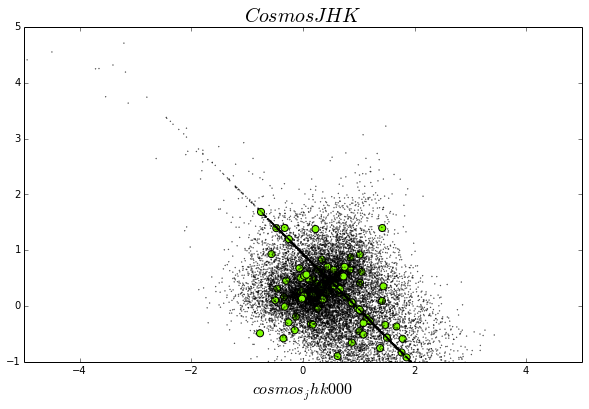

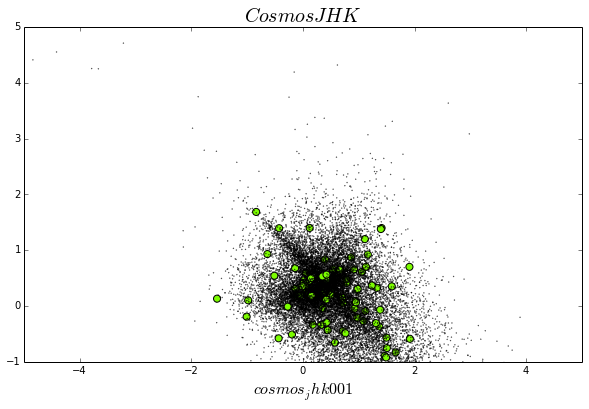

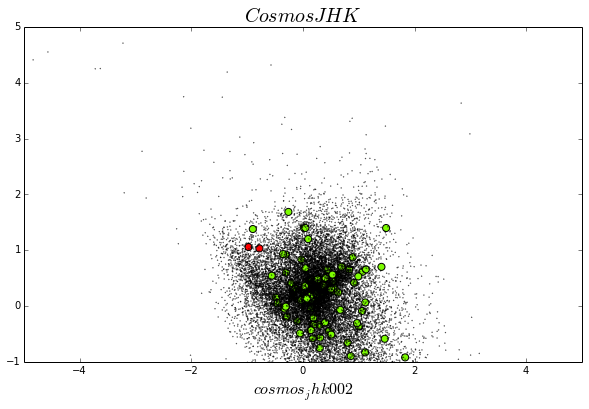

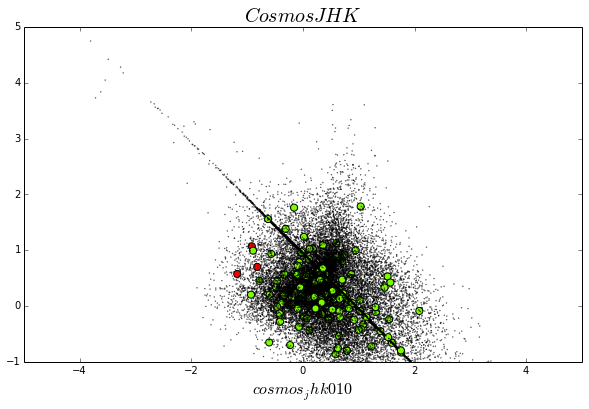

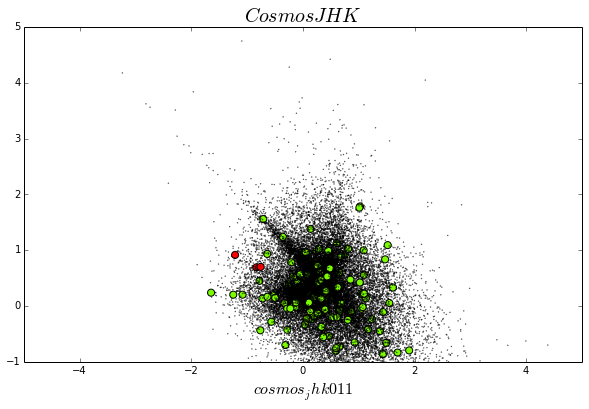

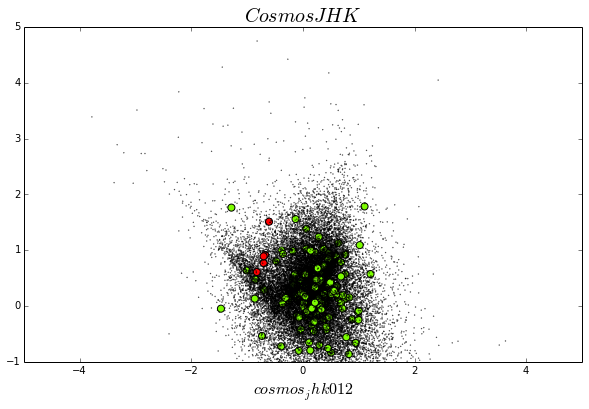

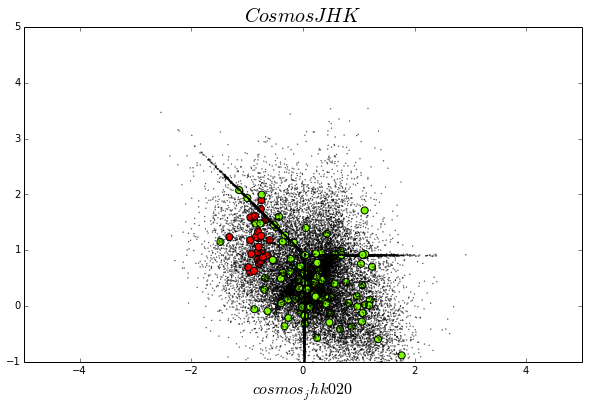

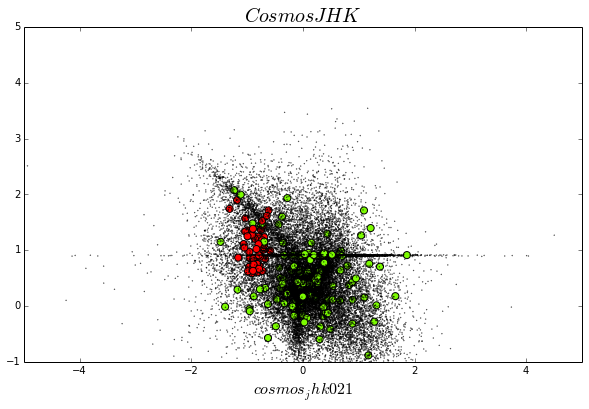

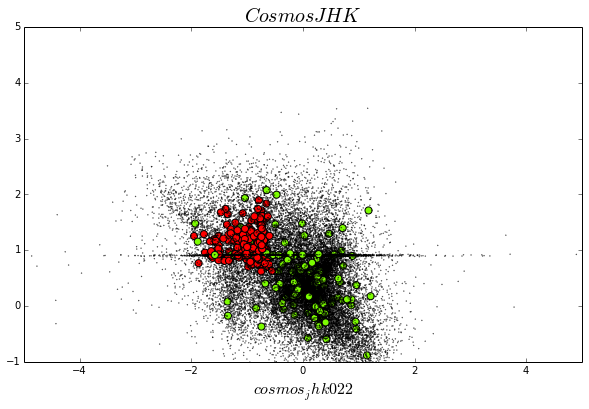

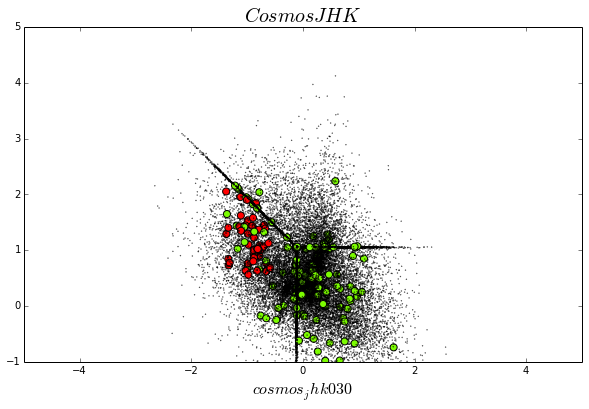

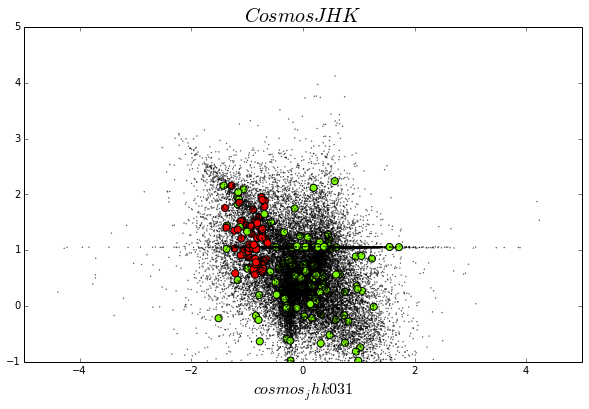

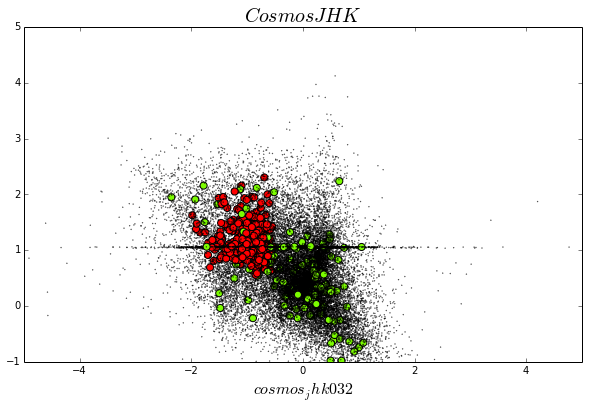

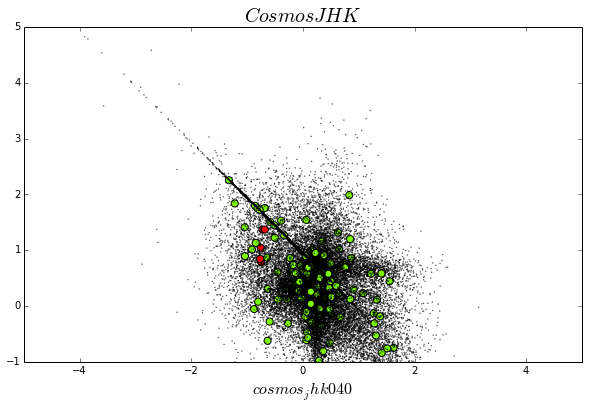

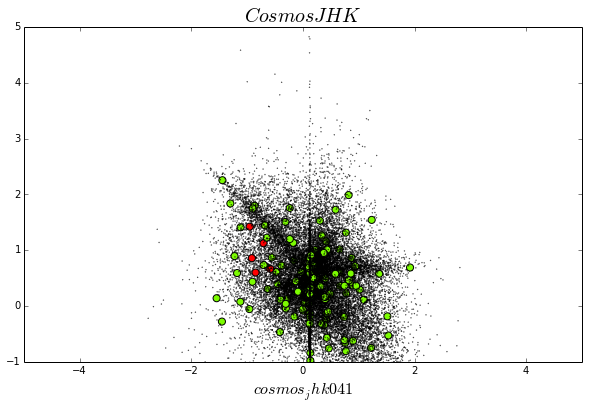

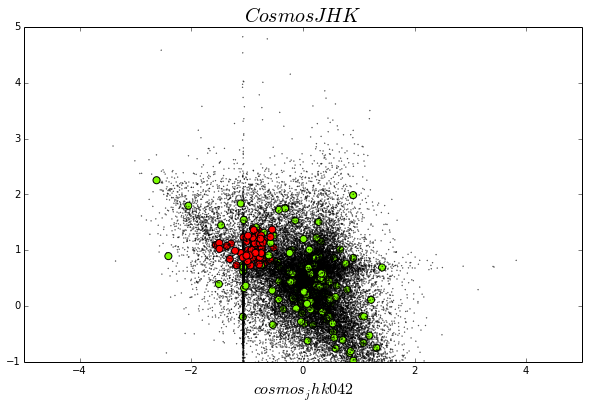

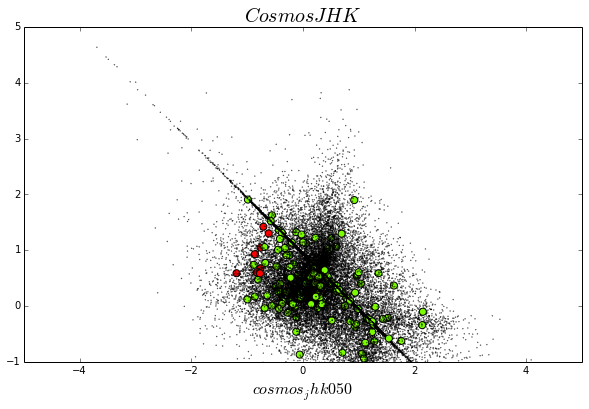

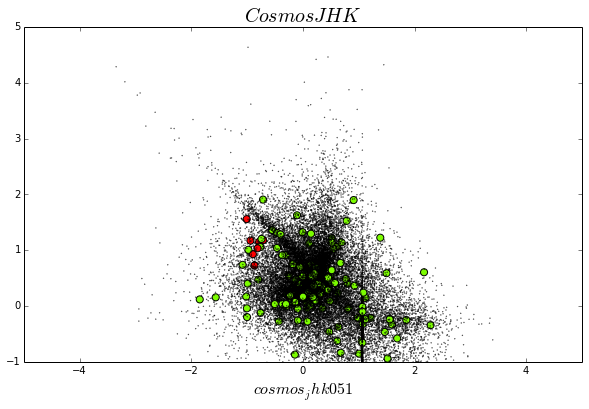

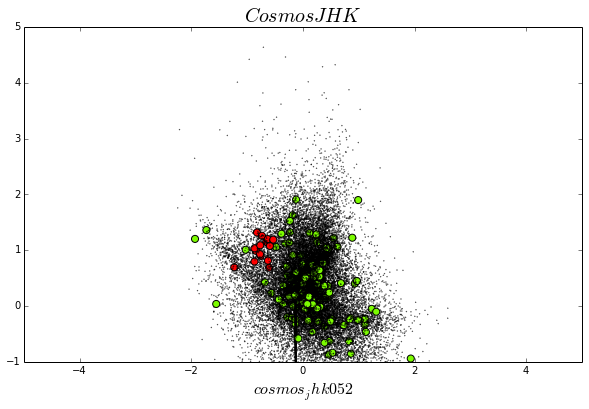

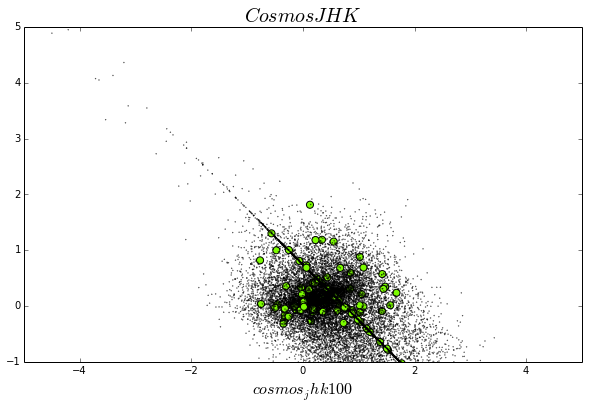

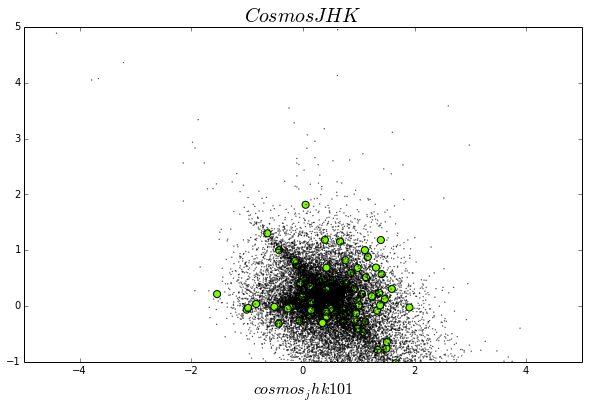

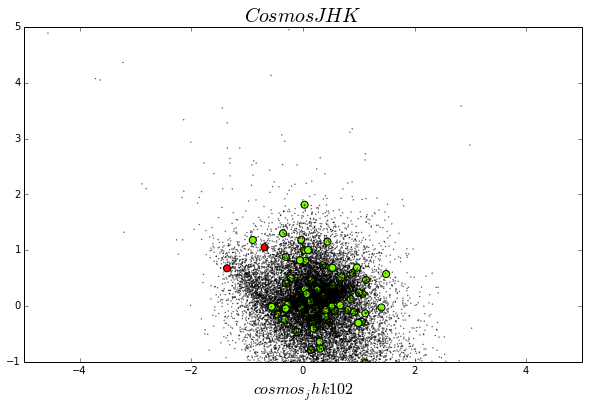

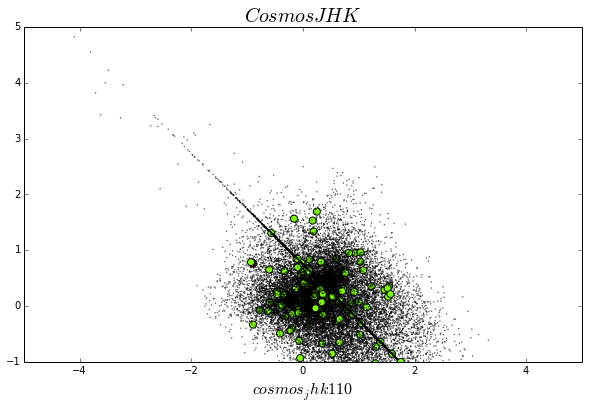

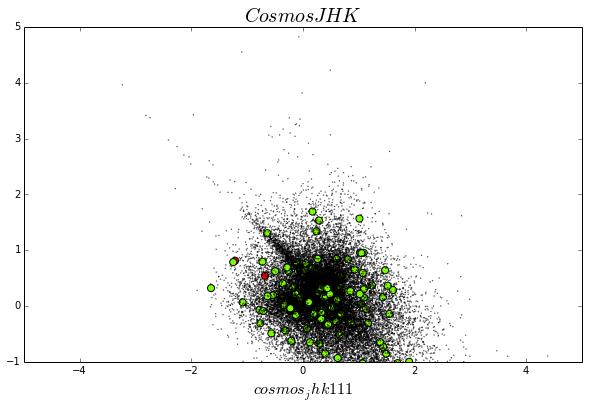

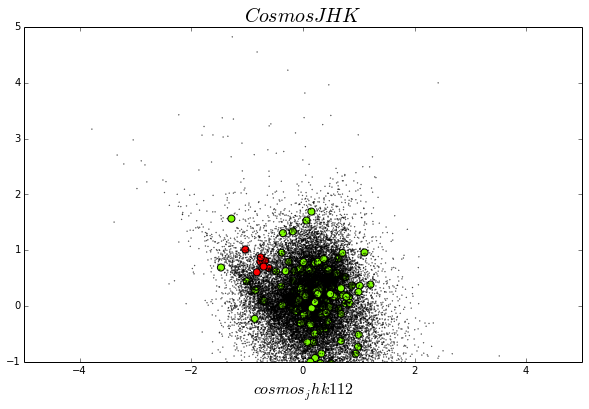

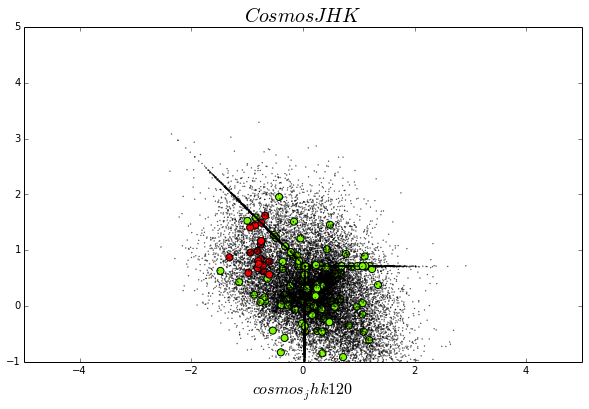

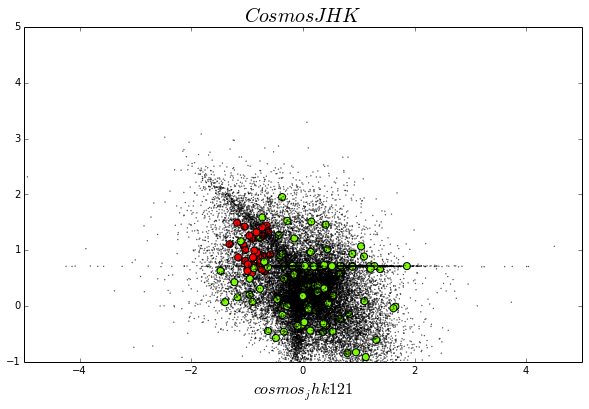

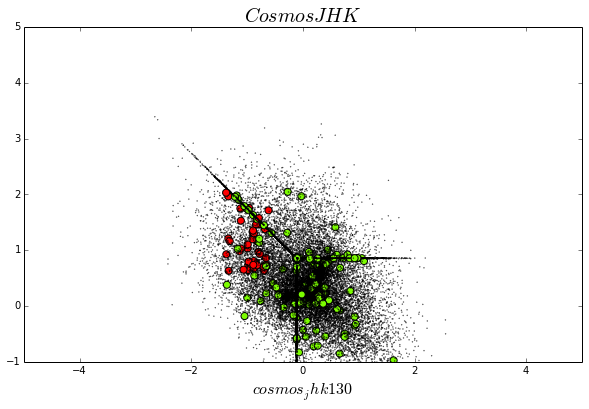

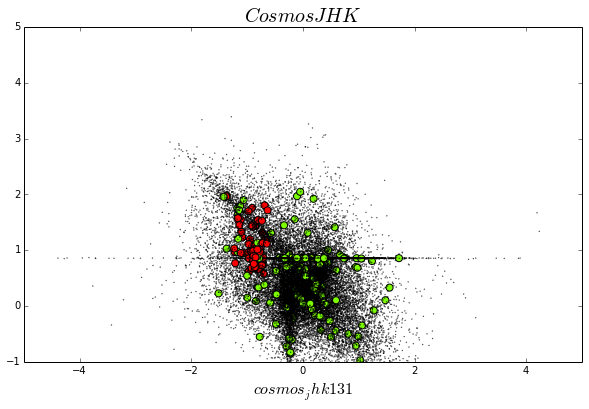

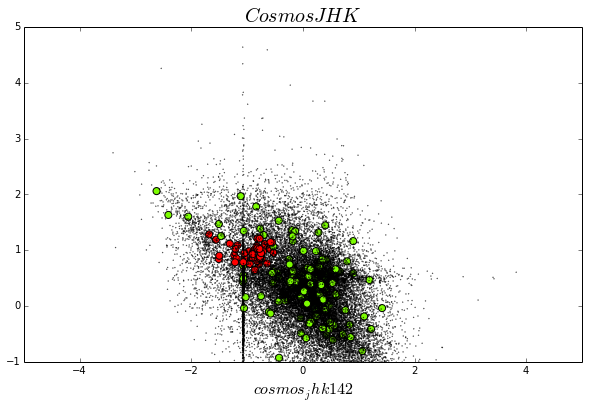

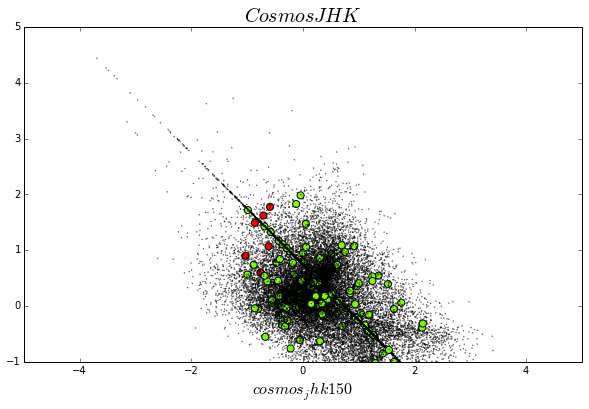

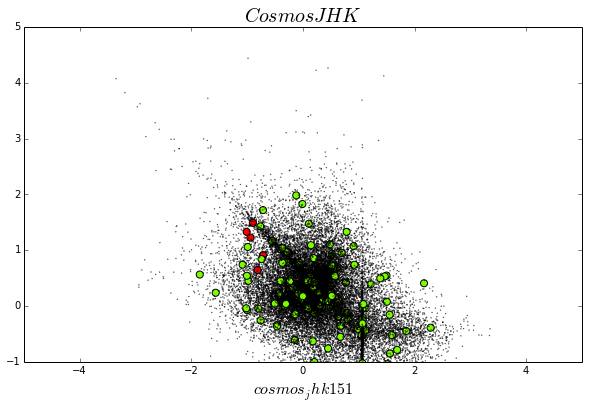

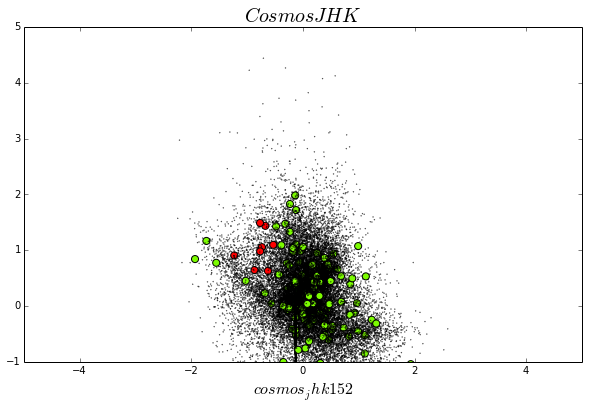

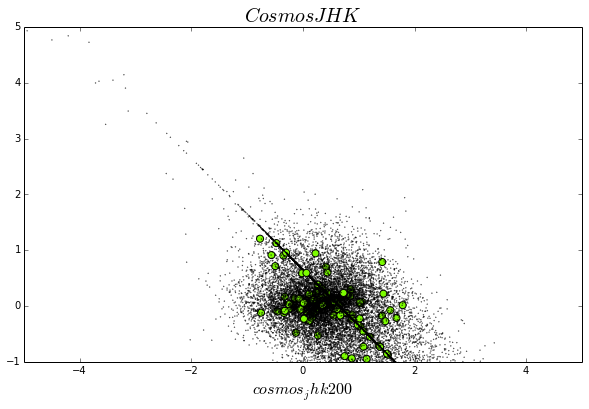

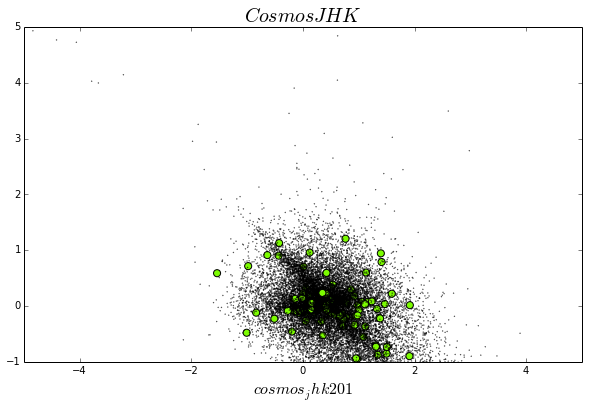

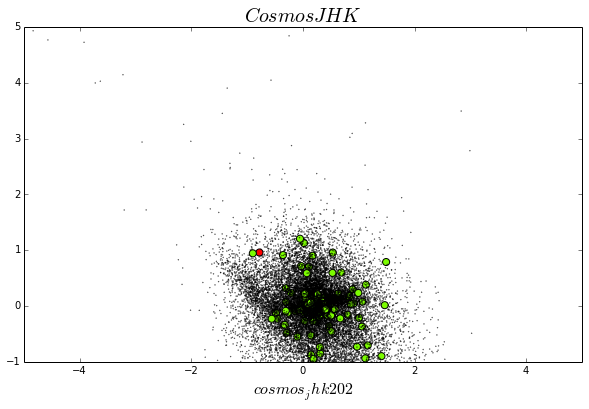

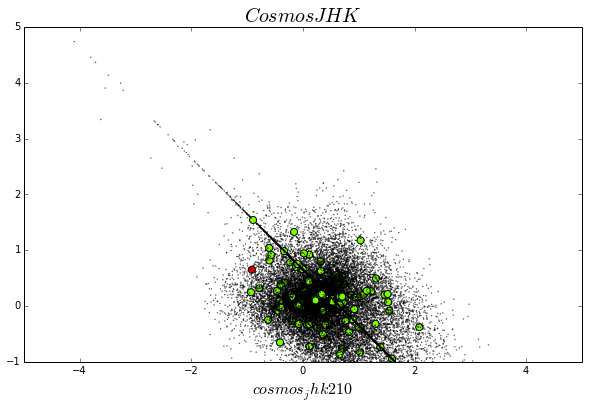

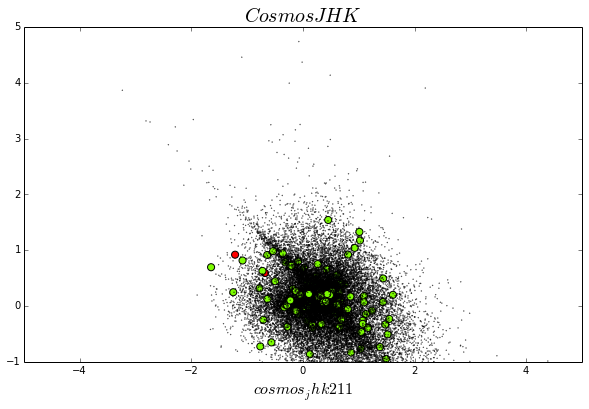

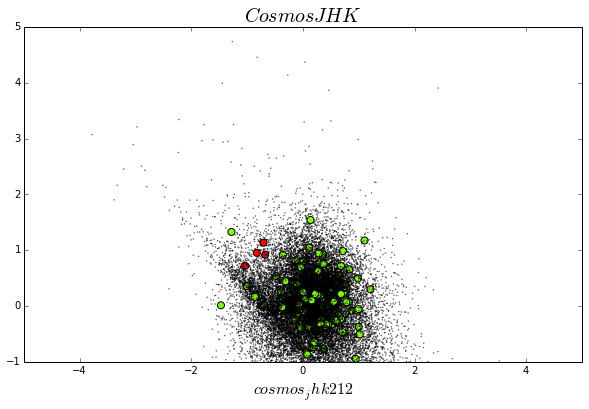

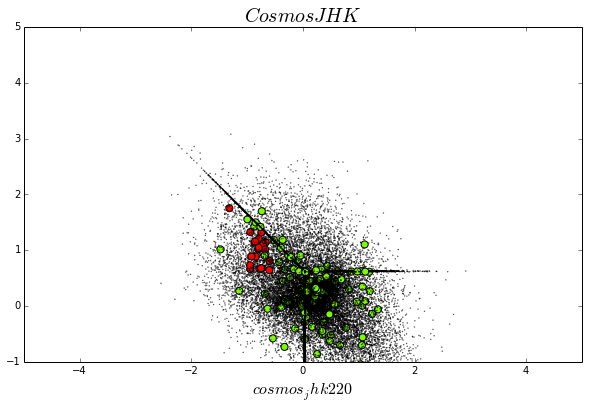

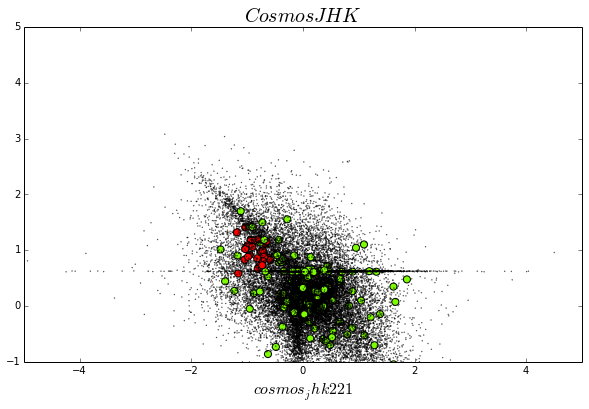

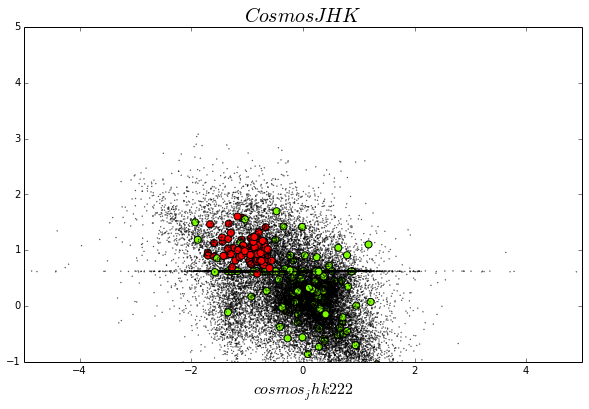

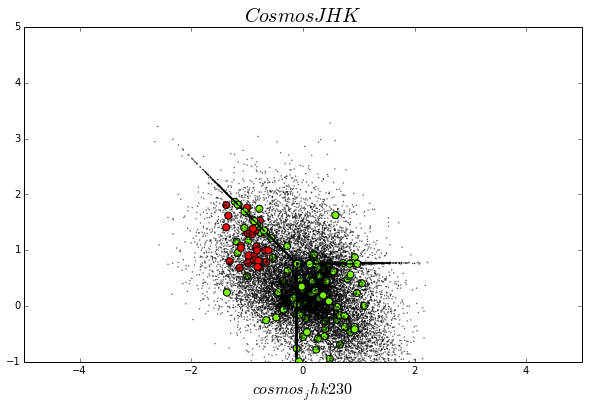

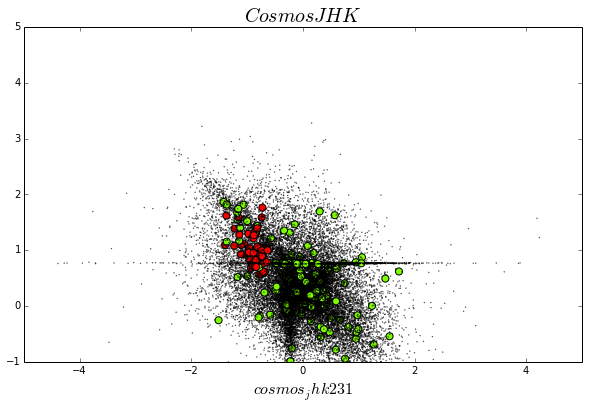

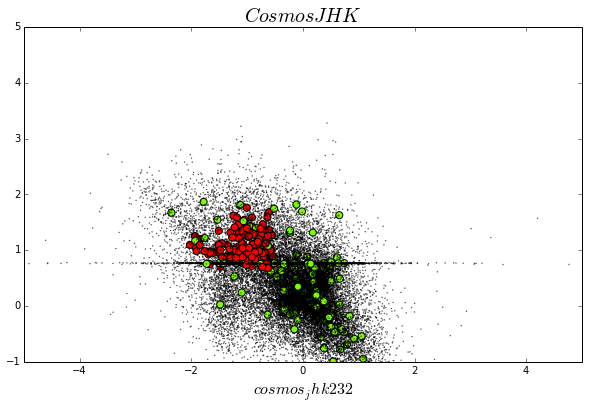

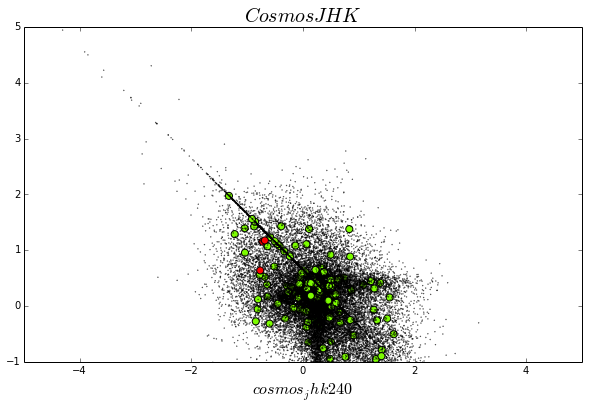

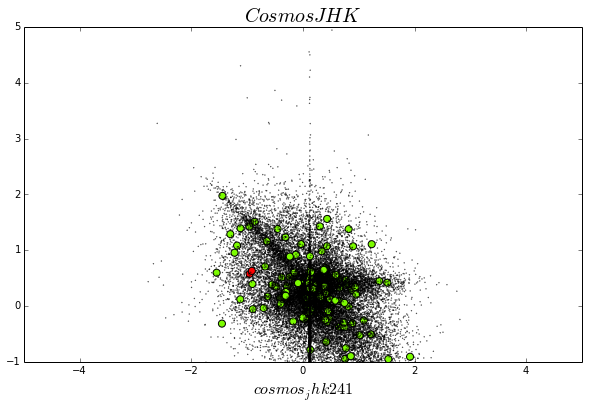

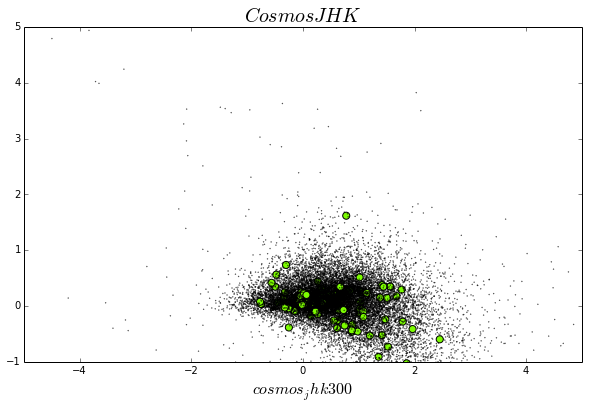

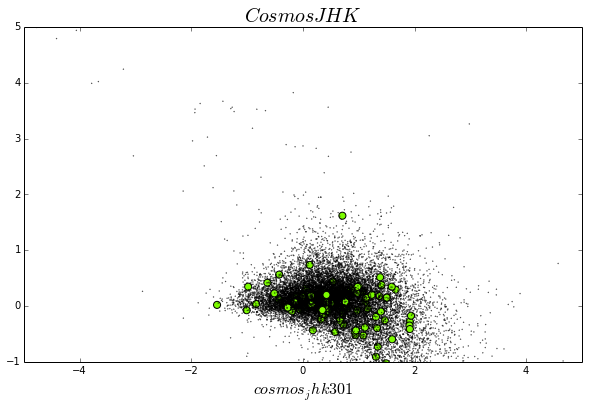

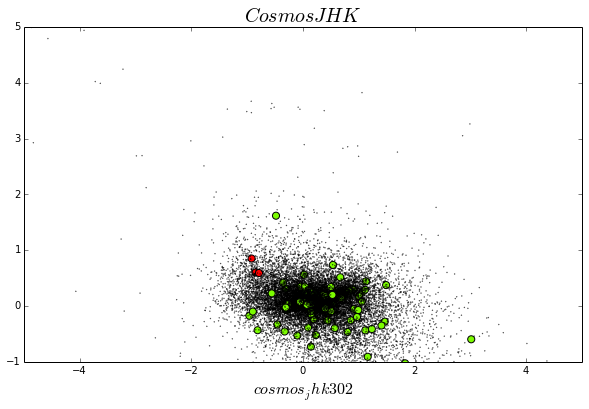

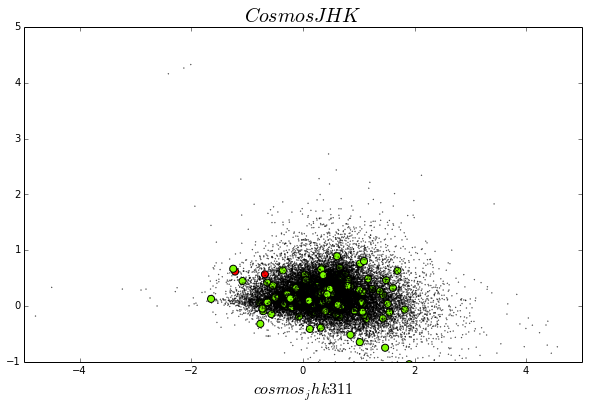

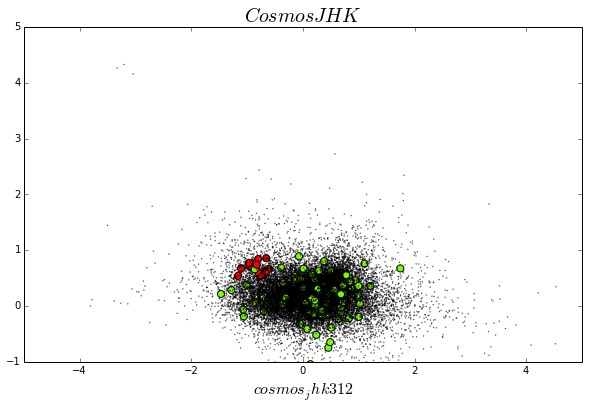

In [12]:
###ijh selection###
bfils = [cosmos_data['f_j1'], cosmos_data['e_j1'], cosmos_data['f_j2'], cosmos_data['e_j2'], cosmos_data['f_j3'], cosmos_data['e_j3'] , cosmos_data['f_f125w'],cosmos_data['e_f125w'], cosmos_data['f_j'], cosmos_data['e_j'], cosmos_data['f_UVISTA_J'], cosmos_data['e_UVISTA_J'] ]
cfils= [cosmos_data['f_f140w'], cosmos_data['e_f140w'], cosmos_data['f_f160w'], cosmos_data['e_f160w'], cosmos_data['f_h1'], cosmos_data['e_h1'] , cosmos_data['f_h2'],cosmos_data['e_h2'], cosmos_data['f_h'], cosmos_data['e_h'], cosmos_data['f_UVISTA_H'], cosmos_data['e_UVISTA_H'] ]
afils= [cosmos_data['f_I'], cosmos_data['e_I'], cosmos_data['f_Ip'], cosmos_data['e_Ip'], cosmos_data['f_f814W'], cosmos_data['e_f814W']]

for a in range(0,3):
    for b in range (0,6):
        for c in range (0,6):
            globals()['cosmos_ijh%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,6):
        for c in range (0,6):
            print "cosmos_ijh%d%d%d"%(a,b,c), np.count_nonzero((globals()['cosmos_ijh%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


 cosmos_ijh000 253
cosmos_ijh001 699
cosmos_ijh002 4
cosmos_ijh003 4
cosmos_ijh004 14
cosmos_ijh005 81
cosmos_ijh010 401
cosmos_ijh011 966
cosmos_ijh012 5
cosmos_ijh013 5
cosmos_ijh014 30
cosmos_ijh015 169
cosmos_ijh020 452
cosmos_ijh021 1077
cosmos_ijh022 13
cosmos_ijh023 4
cosmos_ijh024 46
cosmos_ijh025 195
cosmos_ijh030 4
cosmos_ijh031 54
cosmos_ijh032 2
cosmos_ijh033 2
cosmos_ijh034 11
cosmos_ijh035 11
cosmos_ijh040 775
cosmos_ijh041 1421
cosmos_ijh042 35
cosmos_ijh043 22
cosmos_ijh044 95
cosmos_ijh045 655
cosmos_ijh050 334
cosmos_ijh051 807
cosmos_ijh052 13
cosmos_ijh053 6
cosmos_ijh054 33
cosmos_ijh055 37
cosmos_ijh100 258
cosmos_ijh101 714
cosmos_ijh102 4
cosmos_ijh103 4
cosmos_ijh104 14
cosmos_ijh105 79
cosmos_ijh110 409
cosmos_ijh111 984
cosmos_ijh112 6
cosmos_ijh113 5
cosmos_ijh114 29
cosmos_ijh115 170
cosmos_ijh120 460
cosmos_ijh121 1091
cosmos_ijh122 13
cosmos_ijh123 4
cosmos_ijh124 45
cosmos_ijh125 194
cosmos_ijh130 4
cosmos_ijh131 57
cosmos_ijh132 2
cosmos_ijh133 2
cosmos

In [16]:
print (cosmos_data['id'][cosmos_ijh231 ])

[  844  1573  2301  2953  3501  3684  3864  4187  4432  4924  5576  6148
  9296  9566 11356 11609 12201 13267 13528 13883 14206 14906 14923 15091
 15214 16115 17025 17118 17257 18356 18358 19077 19208 20179 21021 21061
 21306 22073 22346 22440 22719 22726 23147 23738 24660]


In [17]:
###ihk selection###
cfils = [cosmos_data['f_k'], cosmos_data['e_k'], cosmos_data['f_ks'], cosmos_data['e_ks'], cosmos_data['f_uvista_ks'], cosmos_data['e_uvista_ks']]
bfils= [cosmos_data['f_f140w'], cosmos_data['e_f140w'], cosmos_data['f_f160w'], cosmos_data['e_f160w'], cosmos_data['f_h1'], cosmos_data['e_h1'] , cosmos_data['f_h2'],cosmos_data['e_h2'], cosmos_data['f_h'], cosmos_data['e_h'], cosmos_data['f_UVISTA_H'], cosmos_data['e_UVISTA_H'] ]
afils= [cosmos_data['f_I'], cosmos_data['e_I'], cosmos_data['f_Ip'], cosmos_data['e_Ip'], cosmos_data['f_f814W'], cosmos_data['e_f814W']]

for a in range(0,3):
    for b in range (0,6):
        for c in range (0,3):
            globals()['cosmos_ihk%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,6):
        for c in range (0,3):
            print "cosmos_ihk%d%d%d"%(a,b,c), np.count_nonzero((globals()['cosmos_ihk%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


cosmos_ihk000 0
cosmos_ihk001 2
cosmos_ihk002 21
cosmos_ihk010 5
cosmos_ihk011 6
cosmos_ihk012 29
cosmos_ihk020 36
cosmos_ihk021 57
cosmos_ihk022 602
cosmos_ihk030 56
cosmos_ihk031 98
cosmos_ihk032 719
cosmos_ihk040 11
cosmos_ihk041 7
cosmos_ihk042 366
cosmos_ihk050 13
cosmos_ihk051 11
cosmos_ihk052 74
cosmos_ihk100 0
cosmos_ihk101 2
cosmos_ihk102 21
cosmos_ihk110 5
cosmos_ihk111 6
cosmos_ihk112 28
cosmos_ihk120 36
cosmos_ihk121 57
cosmos_ihk122 605
cosmos_ihk130 56
cosmos_ihk131 98
cosmos_ihk132 724
cosmos_ihk140 11
cosmos_ihk141 7
cosmos_ihk142 371
cosmos_ihk150 14
cosmos_ihk151 11
cosmos_ihk152 77
cosmos_ihk200 0
cosmos_ihk201 2
cosmos_ihk202 17
cosmos_ihk210 3
cosmos_ihk211 5
cosmos_ihk212 22
cosmos_ihk220 29
cosmos_ihk221 44
cosmos_ihk222 499
cosmos_ihk230 46
cosmos_ihk231 84
cosmos_ihk232 599
cosmos_ihk240 9
cosmos_ihk241 4
cosmos_ihk242 281
cosmos_ihk250 8
cosmos_ihk251 10
cosmos_ihk252 59


In [18]:
print (cosmos_data['id'][cosmos_ihk210|cosmos_ihk211|cosmos_ihk212 ])

[ 1677  1841  2576  2942  3208  3713  3865  4446  4788  5642  6232  6656
  6665 10382 12917 14846 16944 18200 19704 20373 20825 21770 22341 22368
 22697 23607 24694 25064 26357]


In [19]:
###vij selection###
cfils = [cosmos_data['f_j1'], cosmos_data['e_j1'], cosmos_data['f_j2'], cosmos_data['e_j2'], cosmos_data['f_j3'], cosmos_data['e_j3'] , cosmos_data['f_f125w'],cosmos_data['e_f125w'], cosmos_data['f_j'], cosmos_data['e_j'], cosmos_data['f_UVISTA_J'], cosmos_data['e_UVISTA_J'] ]
bfils= [cosmos_data['f_I'], cosmos_data['e_I'], cosmos_data['f_Ip'], cosmos_data['e_Ip'], cosmos_data['f_f814W'], cosmos_data['e_f814W']]
afils= [cosmos_data['f_v'], cosmos_data['e_v'], cosmos_data['f_f606w'], cosmos_data['e_f606w']]

for a in range(0,2):
    for b in range (0,3):
        for c in range (0,6):
            globals()['cosmos_vij%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,2):
    for b in range (0,3):
        for c in range (0,5):
            print "cosmos_vij%d%d%d"%(a,b,c), np.count_nonzero((globals()['cosmos_vij%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


cosmos_vij000 5
cosmos_vij001 2
cosmos_vij002 3
cosmos_vij003 81
cosmos_vij004 1
cosmos_vij010 2
cosmos_vij011 1
cosmos_vij012 2
cosmos_vij013 56
cosmos_vij014 0
cosmos_vij020 6
cosmos_vij021 2
cosmos_vij022 2
cosmos_vij023 12
cosmos_vij024 1
cosmos_vij100 3
cosmos_vij101 2
cosmos_vij102 3
cosmos_vij103 84
cosmos_vij104 1
cosmos_vij110 2
cosmos_vij111 1
cosmos_vij112 1
cosmos_vij113 63
cosmos_vij114 0
cosmos_vij120 5
cosmos_vij121 2
cosmos_vij122 1
cosmos_vij123 10
cosmos_vij124 1


In [20]:
print (cosmos_data['id'][cosmos_vij123])

[ 1119  7693 12442 15605 17546 18388 20181 22244 22271 22319]
